# Data Cleaning and Visualization Examples

In [366]:
import pandas as pd
import json
import time
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [367]:
# Read in the most recent dataframe

matches = pd.read_pickle('/Users/christophermarker/Documents/Pipeline_sample/assets/master_match_list')

# Showing professional teams with the most wins

In [368]:
# Create a column with the winning team

matches['winning_team'] = [matches.loc[ i , : ][7] if matches.loc[ i , : ][10] == True else 
                           matches.loc[ i , : ][0] for i in matches.index]

In [369]:
# A function to return a dataframe containing the team with the most wins in a given subset of matches

def Most_Wins(matches=matches, n=10, g=matches.shape[0]):
    
    if g == matches.shape[0]:
        matches2 = matches
    else:
        matches2 = matches.head(g)

    mw = pd.DataFrame(matches2['winning_team'][matches2['winning_team'] != ''].value_counts())
    mw.index.rename('Team Name', inplace=True)
    mw.rename(columns={'winning_team':'# of wins'}, inplace=True)
    mw.reset_index(inplace = True)

    return mw.head(n)

In [370]:
# running the function with standard inputs
# (returns the 10 teams with all time most wins)

Most_Wins()

,Team Name,# of wins
0,Team Empire,1128
1,PSG.LGD,1083
2,Virtus.pro,1077
3,Evil Geniuses,976
4,\tVici Gaming,948
5,INVICTUS GAMING,939
6,Natus Vincere,900
7,Alliance,878
8,Fnatic,870
9,Newbee,829


In [371]:
# running the function with custom inputs
# (returns the 5 teams with the most wins in the last 100 professional matches)

Most_Wins(matches,5,100)

,Team Name,# of wins
0,Fourzerozone,4
1,NOVUS,4
2,Unchained Esports,4
3,Madefake Esports,4
4,Geek Fam,4


# Creating a chart showing the win differential between radiant and dire side

In [372]:
# Create a function to plot the wins in a given subset of matches

def Plot_Wins(matches=matches, x=matches.shape[0]):
    
    matches1 = matches.head(x)

    wincounts = matches1['radiant_win'].value_counts().sort_index().plot(kind='bar')

    bars = ['Dire Win', 'Radiant Win']
    y_pos = np.arange(len(bars))
    plt.xticks(y_pos, bars, rotation='horizontal')
    x1,x2,y1,y2 = wincounts.axis()

    t = matches1['radiant_win'].count()
    for p in wincounts.patches:
        wincounts.annotate(str(p.get_height()), (p.get_x() +.1, p.get_height() - (p.get_height() * .5)), weight='bold')
        wincounts.annotate(str(round((p.get_height() / t * 100), 2)) + '%', 
                           (p.get_x() +.1, p.get_height() - ((p.get_height() * .50) + (.05 * y2))), weight='bold')
        
    if x == matches.shape[0]:
        n = ''
    else:
        n = ' (' + str(matches1.shape[0]) + ' most recent matches)'
    
    plt.ylabel('# of Wins', fontweight='bold', fontsize='10', horizontalalignment='center')
    plt.title('Radiant vs. Dire Side Wins' + n,  fontweight='bold', fontsize='12', horizontalalignment='center')

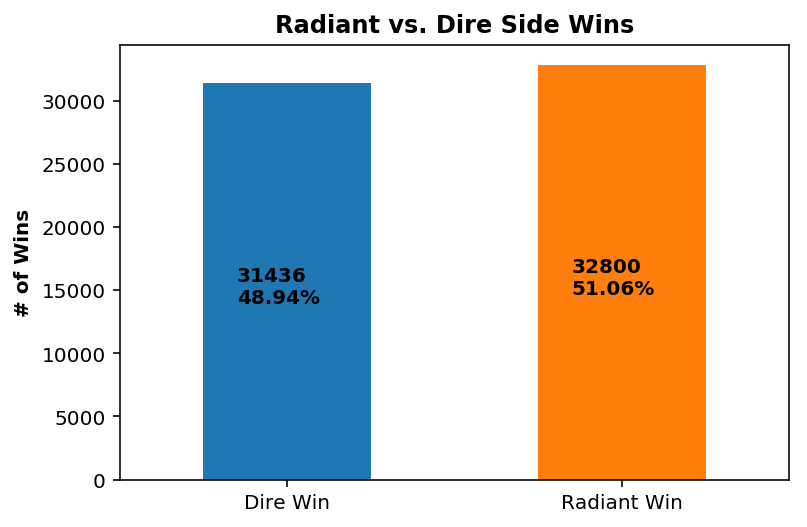

In [373]:
# Running the fucntion with standard inputs
# (gives a bar chart including all professional matches)

Plot_Wins()

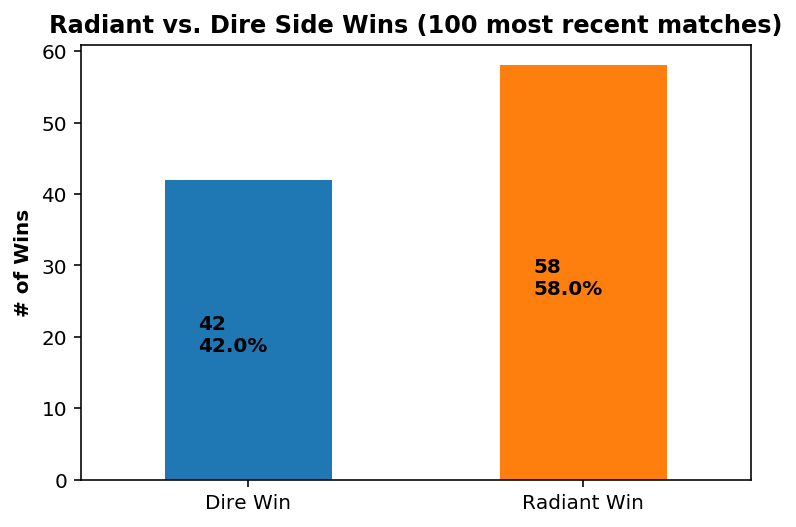

In [374]:
# Running the function with custom inputs
# (gives a bar chart only including the most recent 100 professional matches)

Plot_Wins(matches,100)

In [238]:

str(datetime.timedelta(seconds=666))


'0:11:06'